This notebook shows most of the functionality of the dinocores module. I use it myself whenever we need a specific set of core data from dino. Rather than downloading it from dinoloket.nl, we have extracts of dino core database that can be used for this. What we didn't have, was an efficient way to extract data from this database. That is covered by this module. It's main purpose is to select data based on location or attributes and export it to a shapefile or ipf-file. 

For example: As I write this I'm doing a project for RVO on some new potential wind farm locations. For the geological analysis, I used the shapefile of these areas (7 polygons) to select all Dino cores longer than 3 m within these polygons and within a buffer of 5 km. I then wrote the selected data to an ipf-file and a shapefile, which can be visualised in IMOD/GIS.

The spatial functions to select cores based on point, line or polygon shapefiles were written in an almost completely vectorised way using Numpy only, hence most selections take less than a second to complete. The selection of the example above took about 1/10 of a second, whereas 'Select by Location' in ArcMap took about 14 seconds. The time needed for writing these to shape and/or ipf depends on the amount of selected data. The 16 Gb node writes about 200 cores/s to IPF format, whereas writing a shapefile is much faster. 

Anyway, I hope it can prove helpful in some of your projects.

Erik.

Let's get started:

Make sure that you have a copy of the dinocore folder (p:\430-tgg-data\DINO\Scripts\dinocore\) on a local drive. e.g. in your OneDrive folder.

While in your desired or a new environment, use the anaconda prompt to install Fiona first, unless you already have it:

    conda install Fiona

Then install the package as follows:

    pip install -e c:\your\local\folder\dinocore\
    
Now you can import the module as follows:

In [1]:
import dinocore.dino as dino

# pathlib for path management (much better than os: https://treyhunner.com/2019/01/no-really-pathlib-is-great/)
from pathlib import Path

Give the locations of the meta and data file:

In [2]:
metafile = r'p:\430-tgg-data\DINO\DINO extractie november 2019\DINO_Boornummers_d20191118.csv'
datafile = r'p:\430-tgg-data\DINO\DINO extractie november 2019\DINO_Extractie_bovennaaronder_d20191118.csv'

Now, we can create the dinocores object. This class holds all (meta)data in a pd.DataFrame. Give it a moment to read the 600 Mb csv file. After the initial loading a message will be displayed. The data is now stored in memory and ready for use.

In [3]:
dc = dino.dinocores(metafile, datafile)

Please wait while the data is loaded
Data loaded. Dinocores object is ready for use



Let's see what is in this basic instance of the dinocores class:

In [5]:
# Metadata with one entry per core, giving its ID, location in RD coordinates, 
# surface level (m NAP), end depth (m NAP) and creation date.
dc.meta.head() 

NR       X       Y    MV    END  CREATION_DATE
0  B01C0001  146200  601410  4.60 -27.40       20070111
1  B01C0008  145980  601476  6.12  -9.88       20070111
2  B01C0009  145959  601157  7.35  -8.65       20070111
3  B01C0010  146005  600532  5.35 -10.65       20070111
4  B01C0013  144820  600965  4.60  -1.00       20070112

In [8]:
# Data: each described layer per core
dc.data.head()

nr       x       y   mv   end   top  bottom lith   ak   as   az   ag  \
0  B01C0001  146200  601410  4.6 -27.4  4.60    2.04    Z  NaN  NaN  NaN  NaN   
1  B01C0001  146200  601410  4.6 -27.4  2.04   -0.52    Z  NaN  NaN  NaN  NaN   
2  B01C0001  146200  601410  4.6 -27.4 -0.52   -3.08    Z  NaN  NaN  NaN  NaN   
3  B01C0001  146200  601410  4.6 -27.4 -3.08   -4.36    Z  NaN  NaN  NaN  NaN   
4  B01C0001  146200  601410  4.6 -27.4 -4.36   -6.48    Z  NaN  NaN  NaN  NaN   

    ah  shfr plantfr strat_2003  \
0  NaN  SCHX     NaN        NaN   
1  NaN   NaN     NaN        NaN   
2  NaN  SCHX     NaN        NaN   
3  NaN   NaN     NaN        NaN   
4  NaN   NaN     NaN        NaN   

                                                desc  
0  [ZAND#***#****#*] matig grof# gelykkorrelig# w...  
1  [ZAND#***#****#*] HETZELFDE zand ALS BOVEN# zw...  
2  [ZAND#***#****#*] zand matig grof# gelykkorrel...  
3   [ZAND#***#****#*] zand ALS BOVEN# wit VAN KLEUR.  
4     [ZAND#***#****#*] zand ALS BOVEN# kleibrokjes.

At the heart of this package is the 'select' method. This method is used to make a selection based on an ID string, list of ID strings, Bounding box, Point shapefile, Line shapefile, Polygon shapefile and core length,

In [9]:
# Select core with ID B38A0001
dc.select('B38A0001')

The selection is held in the objects' meta_selection and data_selection attributes:

In [10]:
dc.meta_selection

NR       X       Y   MV    END  CREATION_DATE
292006  B38A0001  108520  447250  0.4 -50.75       20070112

In [11]:
dc.data_selection

nr       x       y   mv    end    top  bottom lith   ak   as  \
2457124  B38A0001  108520  447250  0.4 -50.75   0.40    0.00    V  NaN  NaN   
2457125  B38A0001  108520  447250  0.4 -50.75   0.00   -8.25    V  NaN  NaN   
2457126  B38A0001  108520  447250  0.4 -50.75  -8.25   -9.50    K  NaN  NaN   
2457127  B38A0001  108520  447250  0.4 -50.75  -9.50  -10.40    Z  NaN  NaN   
2457128  B38A0001  108520  447250  0.4 -50.75 -10.40  -14.75    Z  NaN  NaN   
2457129  B38A0001  108520  447250  0.4 -50.75 -14.75  -23.25    Z  NaN  NaN   
2457130  B38A0001  108520  447250  0.4 -50.75 -23.25  -23.75    L  NaN  NaN   
2457131  B38A0001  108520  447250  0.4 -50.75 -23.75  -24.50    Z  NaN  NaN   
2457132  B38A0001  108520  447250  0.4 -50.75 -24.50  -25.25    G  NaN  NaN   
2457133  B38A0001  108520  447250  0.4 -50.75 -25.25  -25.35    L  NaN  NaN   
2457134  B38A0001  108520  447250  0.4 -50.75 -25.35  -26.85    Z  NaN  NaN   
2457135  B38A0001  108520  447250  0.4 -50.75 -26.85  -28.25    Z  NaN  NaN   
2457136  B38A0001  108520  447250  0.4 -50.75 -28.25  -31.25    Z  NaN  NaN   
2457137  B38A0001  108520  447250  0.4 -50.75 -31.25  -35.25    L  NaN  NaN   
2457138  B38A0001  108520  447250  0.4 -50.75 -35.25  -42.00    Z  NaN  NaN   
2457139  B38A0001  108520  447250  0.4 -50.75 -42.00  -46.25    Z  NaN  NaN   
2457140  B38A0001  108520  447250  0.4 -50.75 -46.25  -48.25    Z  NaN  NaN   
2457141  B38A0001  108520  447250  0.4 -50.75 -48.25  -49.40    Z  NaN  NaN   
2457142  B38A0001  108520  447250  0.4 -50.75 -49.40  -50.75    Z  NaN  NaN   

          az   ag   ah  shfr plantfr strat_2003  \
2457124  NaN  NaN  NaN   NaN     NaN       AAOP   
2457125  NaN  NaN  NaN   NaN     NaN       NIHO   
2457126  NaN  NaN  NaN   NaN     NaN         EC   
2457127  NaN  NaN  NaN   NaN     NaN         KR   
2457128  NaN   G3  NaN   NaN     NaN         KR   
2457129  NaN   G3  NaN   NaN     NaN         KR   
2457130  NaN  NaN  NaN   NaN     NaN         UR   
2457131  NaN   G3  NaN   NaN     NaN         UR   
2457132  NaN  NaN  NaN   NaN     NaN         UR   
2457133  NaN  NaN  NaN   NaN     NaN         UR   
2457134  NaN   G3  NaN   NaN     NaN         UR   
2457135  NaN   G3  NaN   NaN     NaN         UR   
2457136  NaN   G3  NaN   NaN     NaN         UR   
2457137  NaN  NaN  NaN   NaN     NaN         ST   
2457138  NaN  NaN  NaN  SCH2     NaN         ST   
2457139  NaN   GX  NaN   NaN     NaN         ST   
2457140  NaN   G1  NaN   NaN     NaN         ST   
2457141  NaN   G1  NaN   NaN     NaN         ST   
2457142  NaN  NaN  NaN   NaN     NaN         WA   

                                                      desc  
2457124                     [GROND#***#****#*] opgebracht.  
2457125  [VEEN#***#****#*] ...............................  
2457126  [KLEI#***#****#*] ...............................  
2457127                      [ZAND#***#****#*] matig grof.  
2457128  [ZAND#***#****#*] grof# MET zeer veel grind# m...  
2457129            [ZAND#***#****#*] grof# MET veel grind.  
2457130  [LEEM#***#****#*] ...............................  
2457131            [ZAND#***#****#*] grof# MET veel grind.  
2457132  [GRIND#***#****#*] ..............................  
2457133  [LEEM#***#****#*] ...............................  
2457134            [ZAND#***#****#*] grof# MET veel grind.  
2457135      [ZAND#***#****#*] matig grof# MET veel grind.  
2457136            [ZAND#***#****#*] grof# MET veel grind.  
2457137  [LEEM#***#****#*] ...............................  
2457138  [ZAND#***#****#*] matig grof# MET weinig hout ...  
2457139  [ZAND#***#****#*] grof# met grind EN leembrokjes.  
2457140  [ZAND#***#****#*] matig grof# MET weinig grind...  
2457141          [ZAND#***#****#*] grof# MET weinig grind.  
2457142  [ZAND#***#****#*] fyn# MET leembrokjes EN glim...

You can use a list of ID's. If an ID does not exist, a warning will be printed:

In [12]:
dc.select(['B38A0001', 'B38A0002', 'B38A0003', 'non-existing-id', 'another-non-existing-id'])

dc.meta_selection

2 IDs were not found, please check names


NR       X       Y    MV    END  CREATION_DATE
292006  B38A0001  108520  447250  0.40 -50.75       20070112
292007  B38A0002  101400  442775 -5.60 -30.60       20070112
292008  B38A0003  101340  442710 -1.47 -26.47       20070112

You can use a shapefile with points in the select method. This requires the keyword argument 'distance', which is the distance in meters to look for dino cores from the query points.

In [13]:
p = Path.cwd()
points_shapefile = p / r'Example input\points_example.shp'

dc.select(points_shapefile, distance=1200)

In [14]:
print(f'{len(dc.meta_selection)} points were selected')

840 points were selected


We can export the selection by using the method 'export'. It requires a path to either a .shp or .ipf file. use the cores = 'all' to export all data (dc.meta, dc.data) or 'sel' to only export the selected data (dc.meta_selection, dc.data_selection). In case an ipf file is made, it is best to create a new folder for it, as it will also create a text file for each core in the target files' root folder.

In [15]:
points_outshape = p.joinpath(r'Example output\cores_within_range.shp')

dc.export(points_outshape, cores='sel', epsg=28992)

Let's see if that worked:

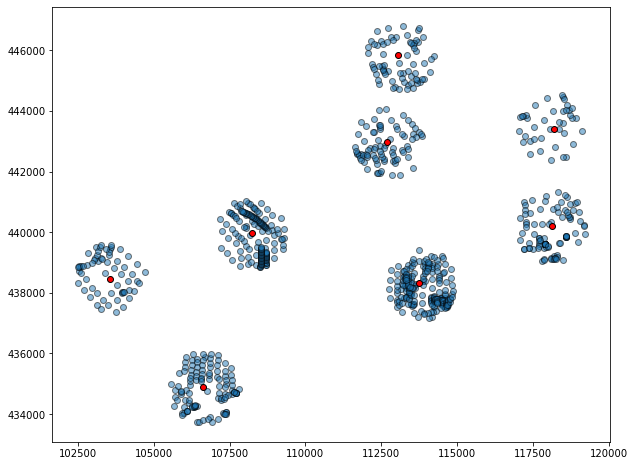

In [16]:
import geopandas as gpd

gdf_in =  gpd.read_file(points_shapefile)
gdf_out = gpd.read_file(points_outshape)

ax = gdf_out.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
gdf_in.plot(ax=ax, color='red', edgecolor='k')

Let's do this for a line shapefile now. All line features within the shapefile will be used. In this example there is only one line. Note that if no coordinate system is given during export to a shapefile, a warning is issued and it will automatically choose epsg 28992, which is RD.

In [17]:
line_shapefile = p / r'Example input\line_example.shp'
line_outshape = p / r'Example output\cores_within_range_line.shp'

dc.select(line_shapefile, distance=1200)
dc.export(line_outshape, cores='sel')

During export of shapefile: no coordinate system was given, using RD new (epsg: 28992) by default. Use keyword epsg = <epsg number> for a different coordinate system



In [18]:
print(f'{len(dc.meta_selection)} points were selected')

768 points were selected


Visualise...

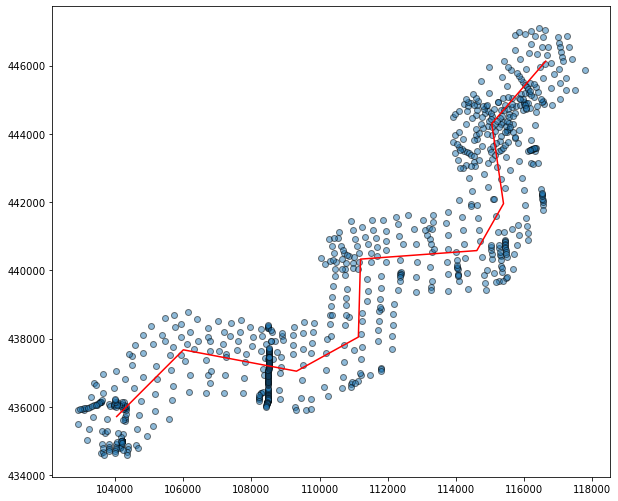

In [19]:
gdf_in_ln =  gpd.read_file(line_shapefile)
gdf_out_ln = gpd.read_file(line_outshape)

ax = gdf_out_ln.plot(figsize=(10, 10), alpha=0.5, edgecolor='k' )
gdf_in_ln.plot(ax=ax, color='red', edgecolor='k')

You can also select from a bounding box by giving xmin, xmax, ymin and ymax coordinates in a list:

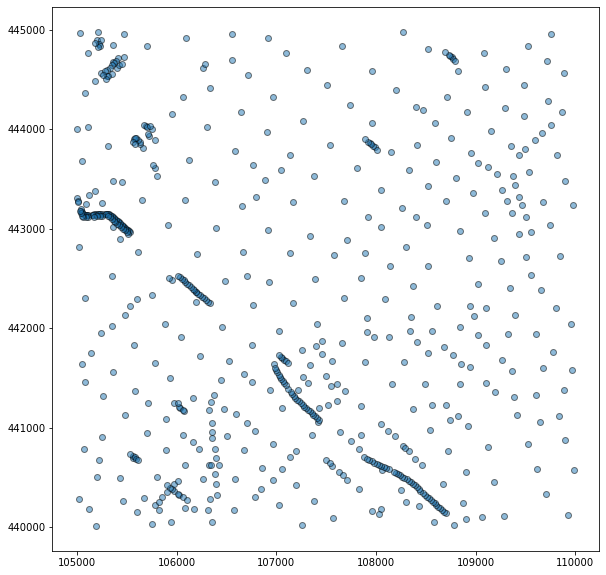

In [20]:
bbox = [105000, 110000, 440000, 445000]
bbox_outshape = p.joinpath(r'Example output\cores_within_bbox.shp')

dc.select(bbox)
dc.export(bbox_outshape, cores='sel', epsg=28992)

gdf_out_bbox = gpd.read_file(bbox_outshape)

ax = gdf_out_bbox.plot(figsize=(10, 10), alpha=0.5, edgecolor='k' )

Probably most useful for a typical project is a selection by polygon. In this case, you have to the option to add a buffer to your polygon by using the keyword 'buffer'. Let's select points inside the polygon and within a buffer of 500 m in the next example: 

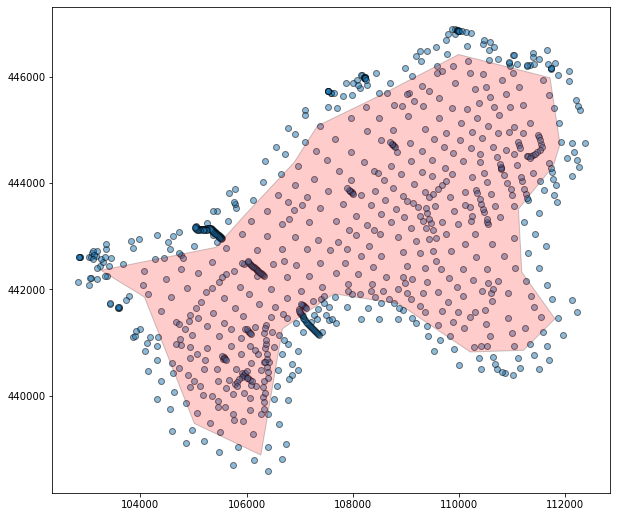

In [21]:
poly_shapefile = p / r'Example input\polygon_example.shp'
poly_outshape = p / r'Example output\cores_within_polygon.shp'

dc.select(poly_shapefile, buffer=500)
dc.export(poly_outshape, cores='sel', epsg=28992)

gdf_in_pl =  gpd.read_file(poly_shapefile)
gdf_out_pl = gpd.read_file(poly_outshape)

ax = gdf_out_pl.plot(figsize=(10, 10), alpha=0.5, edgecolor='k' )
gdf_in_pl.plot(ax=ax, color='red', edgecolor='k', alpha=0.2)

Let's export the current selection to an IPF file:

In [22]:
ipf_folder = p / r'Example output\ipf_folder'
if not ipf_folder.exists():
    ipf_folder.mkdir()

ipf_file = ipf_folder / 'ipf_file.ipf'

dc.export(ipf_file, cores='sel')

Exporting to IPF...: 100%|██████████| 857/857 [00:02<00:00, 379.71it/s]


Load the ipf in Imod to check if it worked...

The select method has a few useful keyword arguments. Let's add these conditions to the above example of selecting points within distance from a line (but it will work in conjunction with all other selection methods, too):

In [23]:
dc.select(line_shapefile, distance=1200, min_len=12, max_len=100, strat=True)
print(f'{len(dc.meta_selection)} points were selected')

90 points were selected


Now we've selected all cores within 1200 m from the line as previously, but only cores with a length between 12 and 100 m and those that have (some of) their stratigraphy interpreted.

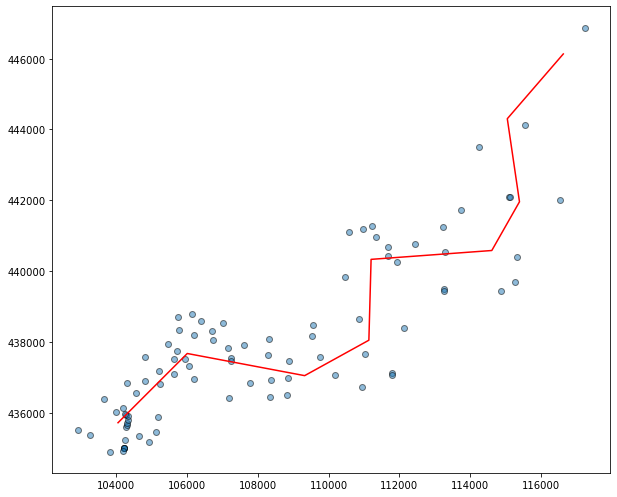

In [24]:
line_outshape_extra = p / r'Example output\cores_within_range_line_and_conds.shp'
dc.export(line_outshape_extra, cores='sel', epsg=28992)

gdf_out_ln = gpd.read_file(line_outshape_extra)
ax = gdf_out_ln.plot(figsize=(10, 10), alpha=0.5, edgecolor='k' )
gdf_in_ln.plot(ax=ax, color='red', edgecolor='k')

You don't have to give the first positional argument to the dinocores.select method. Here we select all cores with a length > 400 m + described stratigraphy from the database. There are 143 of those in the November 2019 data.

In [ ]:
dc.select(min_len=400, strat=True)
print(f'{len(dc.meta_selection)} points were selected')

dc.meta_selection.head()

This sums up the most important functionality of the dinocores module. I will be adding more functionality to the module and I will update this notebook accordingly.

If you have questions, requests or bug reports, please send them to erik.vanonselen@deltares.nl